In [1]:
import numpy as np
import pandas as pd
import random
from collections import defaultdict
import gym
import gym_minigrid
import matplotlib.pyplot as plt
import copy
%matplotlib inline

In [2]:
class QLearning:
    def __init__(self, actions, agent_indicator=10):
        self.actions = actions
        self.agent_indicator = agent_indicator
        self.alpha = 0.01
        self.gamma = 0.9
        self.epsilon = 0.2
        self.q_values = defaultdict(lambda: [0.0] * actions)
        
    def _convert_state(self, s):
        return np.where(s == self.agent_indicator)[0][0]
        
    def update(self, state, action, reward, next_state, next_action):
        state = self._convert_state(state)
        next_state = self._convert_state(next_state)
        
        q_value = self.q_values[state][action]
        
        ########################## Write Code ####################################
        
        next_q_value = np.max(self.q_values[next_state])
        
        td_error = reward + self.gamma * next_q_value - q_value
        self.q_values[state][action] = q_value + self.alpha * td_error
        ###########################################################################
    def act(self, state):
        #################### Write epsilion greedy code ###########################
        if np.random.rand() < self.epsilon:
            action = np.random.choice(self.actions)
        else:
            state = self._convert_state(state)
            q_values = self.q_values[state]
            action = np.argmax(q_values)
        ###########################################################################
        return action

In [3]:
class SARSA:
    def __init__(self, actions, agent_indicator=10):
        self.actions = actions
        self.agent_indicator = agent_indicator
        self.alpha = 0.01
        self.gamma = 0.9
        self.epsilon = 0.2
        self.q_values = defaultdict(lambda: [0.0] * actions)

    def _convert_state(self, s):
        return np.where(s == self.agent_indicator)[0][0]

    def update(self, state, action, reward, next_state, next_action):
        state = self._convert_state(state)
        next_state = self._convert_state(next_state)

        q_value = self.q_values[state][action]
        next_q_value = self.q_values[next_state][next_action]

        td_error = reward + self.gamma * next_q_value - q_value

        self.q_values[state][action] = q_value + self.alpha * td_error

    def act(self, state):
        if np.random.rand() < self.epsilon:
            action = np.random.choice(self.actions)
        else:
            state = self._convert_state(state)
            q_values = self.q_values[state]
            action = np.argmax(q_values)
        return action

In [4]:
def display_q_table(q_values, title="Q-Table"):
    action_count = len(next(iter(q_values.values())))
    df = pd.DataFrame.from_dict(q_values, orient='index', columns=[f'Action {i}' for i in range(action_count)])
    df.index.name = 'State'
    df = df.sort_index() 

    print(f"--- {title} ---")
    pd.set_option('display.float_format', '{:.3f}'.format)
    print(df)
    pd.reset_option('display.float_format')

In [5]:
from utils import gen_wrapped_env, show_video

In [6]:
env = gen_wrapped_env('MiniGrid-Empty-6x6-v0')
# env = gen_wrapped_env('MiniGrid-DoorKey-5x5-v0')

obs = env.reset()

agent_position = obs[0]

agent = QLearning(4, agent_position)

In [7]:
rewards = []
q_value_history_qlearning = [] # Q-value 기록용 리스트
log_interval = 1000 # 기록 간격

for ep in range(500000): # 에피소드 수 줄임 (테스트용)
    done = False
    obs = env.reset()
    # SARSA와 달리 Q-learning은 시작 시 action을 결정할 필요가 없음

    ep_rewards = 0
    while not done:
        # 현재 상태에서 행동 선택 (epsilon-greedy)
        action = agent.act(obs)

        next_obs, reward, done, info = env.step(action)

        # Q-learning 업데이트: 다음 상태에서의 최적 행동 가치 사용 (next_action 불필요)
        agent.update(obs, action, reward, next_obs, None) # Q-learning은 next_action 사용 안함

        ep_rewards += reward
        obs = next_obs
        # 다음 행동은 다음 루프 시작 시 결정

    rewards.append(ep_rewards)
    if (ep+1) % log_interval == 0:
        print("episode: {}, rewards: {}".format(ep+1, ep_rewards))
        q_value_history_qlearning.append(copy.deepcopy(dict(agent.q_values))) # Q-value 복사본 저장
env.close()

episode: 1000, rewards: 0
episode: 2000, rewards: 0
episode: 3000, rewards: 0
episode: 4000, rewards: 0.748
episode: 5000, rewards: 0.09999999999999998
episode: 6000, rewards: 0.31599999999999995
episode: 7000, rewards: 0.478
episode: 8000, rewards: 0.118
episode: 9000, rewards: 0
episode: 10000, rewards: 0
episode: 11000, rewards: 0.73
episode: 12000, rewards: 0
episode: 13000, rewards: 0.118
episode: 14000, rewards: 0.18999999999999995
episode: 15000, rewards: 0.42399999999999993
episode: 16000, rewards: 0
episode: 17000, rewards: 0.478
episode: 18000, rewards: 0
episode: 19000, rewards: 0
episode: 20000, rewards: 0.478
episode: 21000, rewards: 0.5680000000000001
episode: 22000, rewards: 0.604
episode: 23000, rewards: 0
episode: 24000, rewards: 0.784
episode: 25000, rewards: 0.20799999999999996
episode: 26000, rewards: 0.73
episode: 27000, rewards: 0.82
episode: 28000, rewards: 0.784
episode: 29000, rewards: 0.82
episode: 30000, rewards: 0
episode: 31000, rewards: 0.82
episode: 32000

In [8]:
{s:np.round(q, 5).tolist() for s, q in agent.q_values.items()}

{np.int64(0): [0.03237, 0.0325, 0.0395, 0.03244],
 np.int64(12): [0.058, 0.05789, 0.06656, 0.05782],
 np.int64(24): [0.07532, 0.07507, 0.08534, 0.07511],
 np.int64(3): [0.02683, 0.02686, 0.0293, 0.02668],
 np.int64(15): [0.08597, 0.08628, 0.10545, 0.08616],
 np.int64(6): [0.02763, 0.02768, 0.02841, 0.02754],
 np.int64(9): [0.02852, 0.02858, 0.03383, 0.02864],
 np.int64(21): [0.12931, 0.1308, 0.15268, 0.13039],
 np.int64(27): [0.19456, 0.194, 0.23586, 0.19418],
 np.int64(30): [0.24829, 0.2481, 0.28137, 0.24797],
 np.int64(18): [0.10891, 0.10831, 0.12066, 0.10809],
 np.int64(36): [0.08856, 0.08744, 0.10121, 0.0878],
 np.int64(39): [0.38222, 0.38145, 0.43123, 0.38041],
 np.int64(42): [0.49474, 0.49395, 0.57886, 0.49305],
 np.int64(33): [0.28421, 0.28531, 0.33106, 0.28421],
 np.int64(45): [0.0, 0.0, 0.0, 0.0]}

In [9]:
qlearning_final_q_values = agent.q_values

# Q-Learning Q-Table 출력
display_q_table(qlearning_final_q_values, title="Q-Learning Final Q-Table")

--- Q-Learning Final Q-Table ---
       Action 0  Action 1  Action 2  Action 3
State                                        
0         0.032     0.032     0.040     0.032
3         0.027     0.027     0.029     0.027
6         0.028     0.028     0.028     0.028
9         0.029     0.029     0.034     0.029
12        0.058     0.058     0.067     0.058
15        0.086     0.086     0.105     0.086
18        0.109     0.108     0.121     0.108
21        0.129     0.131     0.153     0.130
24        0.075     0.075     0.085     0.075
27        0.195     0.194     0.236     0.194
30        0.248     0.248     0.281     0.248
33        0.284     0.285     0.331     0.284
36        0.089     0.087     0.101     0.088
39        0.382     0.381     0.431     0.380
42        0.495     0.494     0.579     0.493
45        0.000     0.000     0.000     0.000


In [10]:
sim_env = gen_wrapped_env('MiniGrid-Empty-6x6-v0')
obs = sim_env.reset()
done = False
agent.epsilon = 0 # 평가용
while not done:
     action = agent.act(obs)
     obs, reward, done, info = sim_env.step(action)
sim_env.close()
show_video()

In [11]:
import os

# 로그 디렉토리 생성
log_dir = './logs'
os.makedirs(log_dir, exist_ok=True)

# Q-learning 리워드 저장
pd.Series(rewards).to_csv(os.path.join(log_dir, 'rewards_qlearning.csv'))

print(f"Q-learning rewards saved to {os.path.join(log_dir, 'rewards_qlearning.csv')}")


Q-learning rewards saved to ./logs\rewards_qlearning.csv


In [12]:
env = gen_wrapped_env('MiniGrid-Empty-6x6-v0')
# env = gen_wrapped_env('MiniGrid-DoorKey-5x5-v0')

obs = env.reset()

agent_position = obs[0] # 이 부분은 이전 셀에서 obs 정의 후 실행되어야 합니다. 코드를 위로 옮기거나 이전 셀에서 가져와야 함.
                        # 여기서는 이전 Q-learning 셀에서 agent_position 이 정의되었다고 가정합니다.
agent = SARSA(4, agent_position)


rewards_sarsa = [] # 변수명 변경
q_value_history_sarsa = [] # SARSA Q-value 기록용
log_interval = 1000 # 기록 간격 동일하게

for ep in range(500000): # 에피소드 수 줄임 (테스트용)
    done = False
    obs = env.reset()
    action = agent.act(obs) # 에피소드 시작 시 첫 행동 결정

    ep_rewards = 0
    while not done:
        next_obs, reward, done, info = env.step(action)

        next_action = agent.act(next_obs) # 다음 상태에서 다음 행동 결정

        agent.update(obs, action, reward, next_obs, next_action) # SARSA 업데이트

        ep_rewards += reward
        obs = next_obs
        action = next_action # 다음 스텝을 위해 행동 업데이트
    rewards_sarsa.append(ep_rewards) # 변경된 변수명 사용
    if (ep+1) % log_interval == 0:
        print("episode: {}, rewards: {}".format(ep+1, ep_rewards))
        q_value_history_sarsa.append(copy.deepcopy(dict(agent.q_values))) # SARSA Q-value 복사본 저장
env.close()

# SARSA 리워드 저장 (파일명 및 경로 수정)
pd.Series(rewards_sarsa).to_csv(os.path.join(log_dir, 'rewards_sarsa.csv'))
print(f"SARSA rewards saved to {os.path.join(log_dir, 'rewards_sarsa.csv')}")

episode: 1000, rewards: 0
episode: 2000, rewards: 0.82
episode: 3000, rewards: 0
episode: 4000, rewards: 0
episode: 5000, rewards: 0.514
episode: 6000, rewards: 0.784
episode: 7000, rewards: 0.802
episode: 8000, rewards: 0.748
episode: 9000, rewards: 0.622
episode: 10000, rewards: 0
episode: 11000, rewards: 0.874
episode: 12000, rewards: 0
episode: 13000, rewards: 0
episode: 14000, rewards: 0.838
episode: 15000, rewards: 0
episode: 16000, rewards: 0
episode: 17000, rewards: 0
episode: 18000, rewards: 0.856
episode: 19000, rewards: 0
episode: 20000, rewards: 0
episode: 21000, rewards: 0
episode: 22000, rewards: 0.6579999999999999
episode: 23000, rewards: 0
episode: 24000, rewards: 0.784
episode: 25000, rewards: 0
episode: 26000, rewards: 0
episode: 27000, rewards: 0.874
episode: 28000, rewards: 0
episode: 29000, rewards: 0.22599999999999998
episode: 30000, rewards: 0.20799999999999996
episode: 31000, rewards: 0
episode: 32000, rewards: 0
episode: 33000, rewards: 0.838
episode: 34000, re

In [13]:
{s: np.round(q, 5).tolist() for s, q in agent.q_values.items()}

{np.int64(0): [0.02445, 0.02453, 0.02952, 0.02459],
 np.int64(12): [0.04551, 0.04551, 0.05115, 0.04518],
 np.int64(24): [0.06076, 0.06095, 0.06923, 0.06066],
 np.int64(3): [0.01855, 0.01862, 0.02294, 0.01866],
 np.int64(6): [0.01965, 0.01977, 0.02134, 0.01987],
 np.int64(15): [0.07295, 0.0727, 0.08626, 0.07254],
 np.int64(9): [0.02242, 0.02258, 0.02598, 0.02253],
 np.int64(18): [0.09175, 0.09238, 0.10575, 0.09242],
 np.int64(27): [0.17192, 0.17255, 0.20026, 0.171],
 np.int64(36): [0.07236, 0.07261, 0.08959, 0.07232],
 np.int64(39): [0.35474, 0.35204, 0.41233, 0.35248],
 np.int64(21): [0.11216, 0.11187, 0.13465, 0.11185],
 np.int64(30): [0.22114, 0.2225, 0.25404, 0.22233],
 np.int64(33): [0.26574, 0.26971, 0.3048, 0.26511],
 np.int64(45): [0.0, 0.0, 0.0, 0.0],
 np.int64(42): [0.47536, 0.47409, 0.56564, 0.4746]}

In [14]:
sarsa_final_q_values = agent.q_values

# SARSA Q-Table 출력
display_q_table(sarsa_final_q_values, title="SARSA Final Q-Table")

--- SARSA Final Q-Table ---
       Action 0  Action 1  Action 2  Action 3
State                                        
0         0.024     0.025     0.030     0.025
3         0.019     0.019     0.023     0.019
6         0.020     0.020     0.021     0.020
9         0.022     0.023     0.026     0.023
12        0.046     0.046     0.051     0.045
15        0.073     0.073     0.086     0.073
18        0.092     0.092     0.106     0.092
21        0.112     0.112     0.135     0.112
24        0.061     0.061     0.069     0.061
27        0.172     0.173     0.200     0.171
30        0.221     0.223     0.254     0.222
33        0.266     0.270     0.305     0.265
36        0.072     0.073     0.090     0.072
39        0.355     0.352     0.412     0.352
42        0.475     0.474     0.566     0.475
45        0.000     0.000     0.000     0.000


In [15]:
sim_env = gen_wrapped_env('MiniGrid-Empty-6x6-v0')
obs = sim_env.reset()
done = False
agent.epsilon = 0 # 평가용
while not done:
     action = agent.act(obs)
     obs, reward, done, info = sim_env.step(action)
sim_env.close()
show_video()

In [16]:
sarsa_logs = pd.read_csv('./logs/rewards_sarsa.csv', index_col=False).iloc[:, 1]
q_logs = pd.read_csv('./logs/rewards_qlearning.csv', index_col=False).iloc[:, 1]

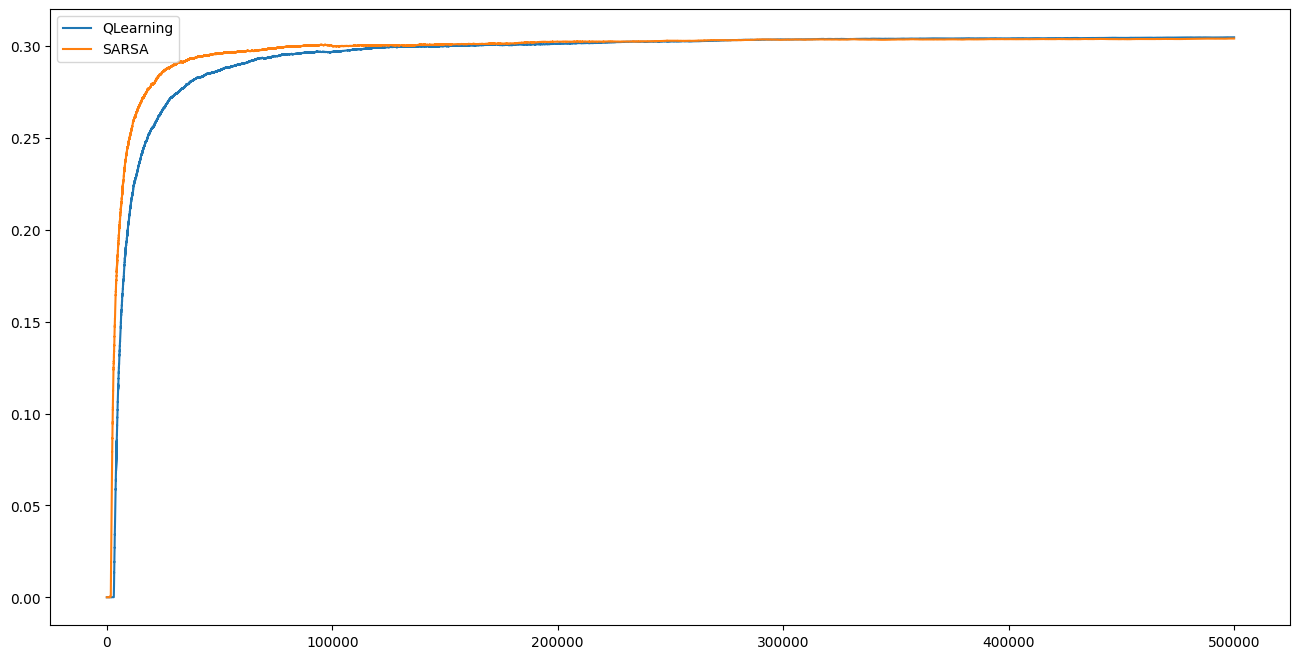

In [17]:
plt.figure(figsize=(16, 8))
plt.plot(q_logs.cumsum() / (pd.Series(np.arange(q_logs.shape[0]))+1), label="QLearning")
plt.plot(sarsa_logs.cumsum() / (pd.Series(np.arange(sarsa_logs.shape[0]))+1), label="SARSA")
plt.legend()

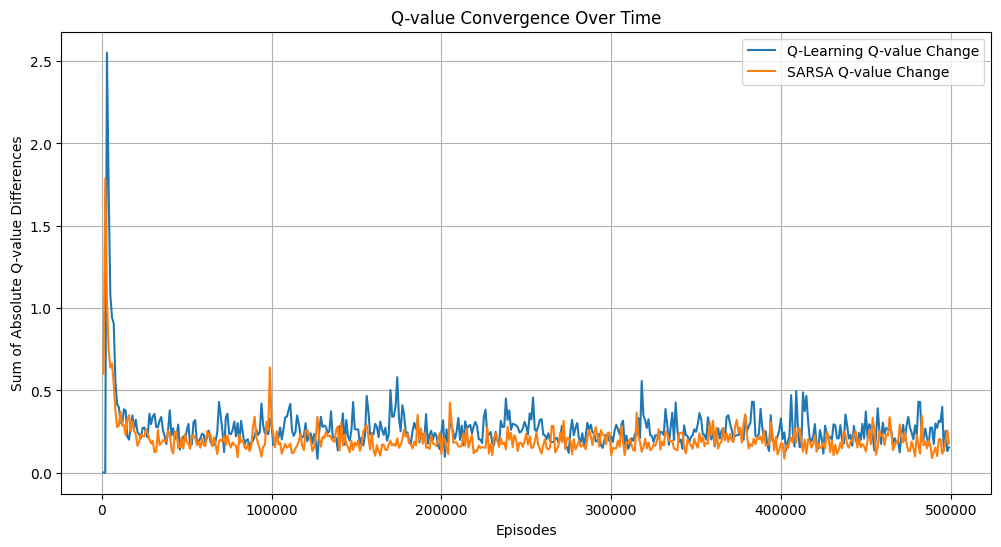

In [18]:
def calculate_q_value_diff(q_history):
    """ 연속된 Q-value 테이블 간의 차이(절대값 합)를 계산합니다. """
    diffs = []
    # history의 첫 번째 항목은 비교 대상이 없으므로 두 번째부터 시작
    for i in range(1, len(q_history)):
        prev_q_table = defaultdict(lambda: [0.0] * len(next(iter(q_history[i-1].values()))), q_history[i-1])
        current_q_table = defaultdict(lambda: [0.0] * len(next(iter(q_history[i].values()))), q_history[i])
        
        total_diff = 0
        # 두 테이블에 존재하는 모든 상태(키)에 대해 반복
        all_states = set(prev_q_table.keys()) | set(current_q_table.keys())
        
        for state in all_states:
            prev_values = np.array(prev_q_table[state])
            current_values = np.array(current_q_table[state])
            total_diff += np.sum(np.abs(current_values - prev_values))
            
        diffs.append(total_diff)
    return diffs

# Q-value 변화량 계산
qlearning_diffs = calculate_q_value_diff(q_value_history_qlearning)
sarsa_diffs = calculate_q_value_diff(q_value_history_sarsa)

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(np.arange(1, len(qlearning_diffs) + 1) * log_interval, qlearning_diffs, label='Q-Learning Q-value Change')
plt.plot(np.arange(1, len(sarsa_diffs) + 1) * log_interval, sarsa_diffs, label='SARSA Q-value Change')
plt.xlabel('Episodes')
plt.ylabel('Sum of Absolute Q-value Differences')
plt.title('Q-value Convergence Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
# 감가율 변화실험 (q-learning으로 실험험)
import time

def run_experiment(algorithm_class, env_name, gamma, num_episodes, log_interval=1000):
    """지정된 알고리즘과 감가율로 학습을 실행하고 결과를 반환합니다."""
    env = gen_wrapped_env(env_name)
    obs = env.reset() # 초기화 위치 중요

    # 에이전트 생성 시 actions 개수 필요 (env.action_space.n 사용 가능)
    # MiniGrid-Empty-6x6-v0의 경우 4개로 가정
    agent = algorithm_class(actions=4)
    agent.gamma = gamma # 감가율 설정
    # agent.epsilon = 0.1 # 필요 시 epsilon도 조절 가능
    # agent.alpha = 0.1 # 필요 시 alpha도 조절 가능

    rewards_history = []
    q_value_history = []
    start_time = time.time()

    for ep in range(num_episodes):
        done = False
        obs = env.reset()
        ep_rewards = 0

        if isinstance(agent, SARSA):
            action = agent.act(obs) # SARSA는 첫 액션 필요

        while not done:
            if isinstance(agent, QLearning):
                action = agent.act(obs) # Q-Learning은 매 스텝 액션 결정

            next_obs, reward, done, info = env.step(action)

            if isinstance(agent, QLearning):
                agent.update(obs, action, reward, next_obs, None) # Q-Learning 업데이트
            elif isinstance(agent, SARSA):
                next_action = agent.act(next_obs) # SARSA는 다음 액션 결정
                agent.update(obs, action, reward, next_obs, next_action) # SARSA 업데이트
                action = next_action # 다음 스텝을 위해

            ep_rewards += reward
            obs = next_obs

        rewards_history.append(ep_rewards)
        if (ep + 1) % log_interval == 0:
            # Q-value 기록 (깊은 복사 사용)
            q_value_history.append(copy.deepcopy(dict(agent.q_values)))
            # print(f"Algo: {algorithm_class.__name__}, Gamma: {gamma}, Episode: {ep+1}/{num_episodes}, Reward: {ep_rewards:.3f}")

    end_time = time.time()
    print(f"Finished: {algorithm_class.__name__} with gamma={gamma}. Time: {end_time - start_time:.2f}s")
    env.close()

    return {
        'rewards': rewards_history,
        'q_history': q_value_history,
        'final_q': dict(agent.q_values) # 최종 Q-table
    }


In [20]:
gammas = [0.1, 0.5, 0.9, 0.99]
env_name = 'MiniGrid-Empty-6x6-v0'
num_episodes_experiment = 500000 # 실험용 에피소드 수 (시간 단축 위해 줄임)
log_interval_experiment = 1000 # Q-value 기록 간격

# 결과를 Q-Learning에 대해서만 저장
experiment_results_qlearning = {}

for gamma in gammas:
    print(f"--- Running Q-Learning with gamma = {gamma} ---")
    experiment_results_qlearning[gamma] = run_experiment(
        QLearning, env_name, gamma, num_episodes_experiment, log_interval_experiment
    )


--- Running Q-Learning with gamma = 0.1 ---
Finished: QLearning with gamma=0.1. Time: 2664.95s
--- Running Q-Learning with gamma = 0.5 ---
Finished: QLearning with gamma=0.5. Time: 2586.03s
--- Running Q-Learning with gamma = 0.9 ---
Finished: QLearning with gamma=0.9. Time: 2594.54s
--- Running Q-Learning with gamma = 0.99 ---
Finished: QLearning with gamma=0.99. Time: 2803.30s


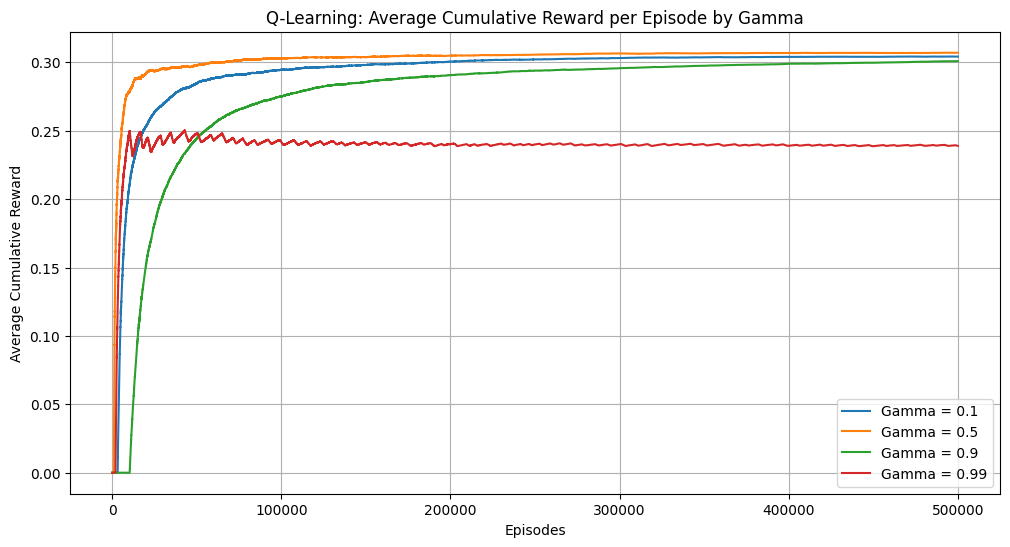

In [21]:
plt.figure(figsize=(12, 6)) # Figure 크기 조정

# Q-Learning 보상 시각화
for gamma in gammas:
    # 결과 딕셔너리 이름 변경 확인
    rewards = experiment_results_qlearning[gamma]['rewards']
    cumulative_avg_reward = pd.Series(rewards).cumsum() / (pd.Series(np.arange(len(rewards))) + 1)
    plt.plot(cumulative_avg_reward, label=f'Gamma = {gamma}')

plt.title('Q-Learning: Average Cumulative Reward per Episode by Gamma')
plt.xlabel('Episodes')
plt.ylabel('Average Cumulative Reward')
plt.legend()
plt.grid(True)
plt.show()

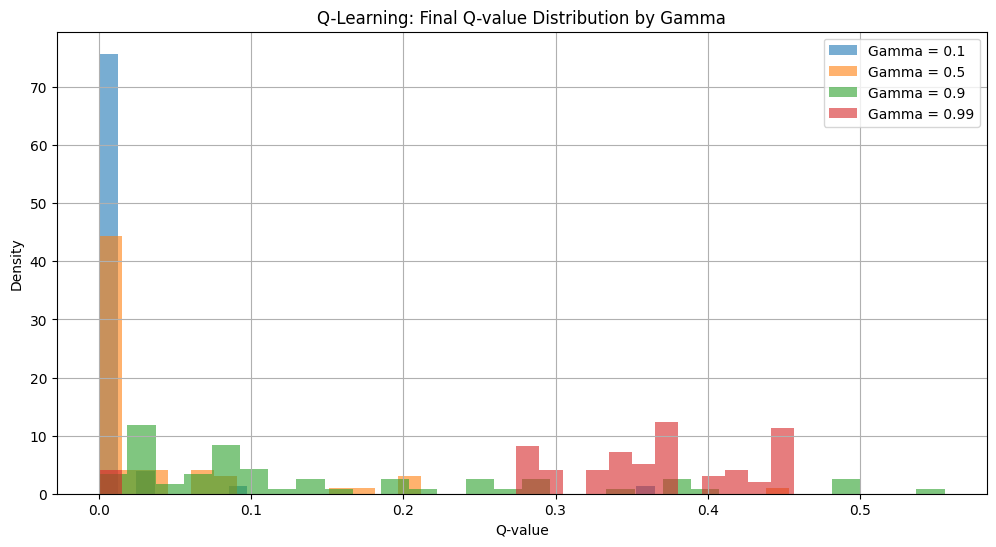

In [22]:
plt.figure(figsize=(12, 6)) # Figure 크기 조정

# Q-Learning Q-value 분포 시각화
all_q_values_qlearning = {}
for gamma in gammas:
    # 결과 딕셔너리 이름 변경 확인
    final_q = experiment_results_qlearning[gamma]['final_q']
    q_values_flat = [q for state_q_list in final_q.values() for q in state_q_list]
    if q_values_flat:
         all_q_values_qlearning[gamma] = q_values_flat
         plt.hist(q_values_flat, bins=30, alpha=0.6, label=f'Gamma = {gamma}', density=True)

plt.title('Q-Learning: Final Q-value Distribution by Gamma')
plt.xlabel('Q-value')
plt.ylabel('Density')
if all_q_values_qlearning:
    plt.legend()
plt.grid(True)
plt.show()